# Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing


In [5]:
# !pip install lightgbm

In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

In [7]:
train_df = pd.read_csv('./assignment2_data/assignment_2_train.csv')
test_df = pd.read_csv('./assignment2_data/assignment_2_test.csv')

In [8]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


Расмотрим, для начала, что из себя представляет датасет.

In [9]:
test_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test_df['isFraud'].value_counts()

0    96197
1     3804
Name: isFraud, dtype: int64

In [11]:
train_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_df['isFraud'].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

Выборки что на обучении, что на тесте не сбалансированы. При обучении скорее всего придется отдельно выполнять баласировку. 

In [13]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


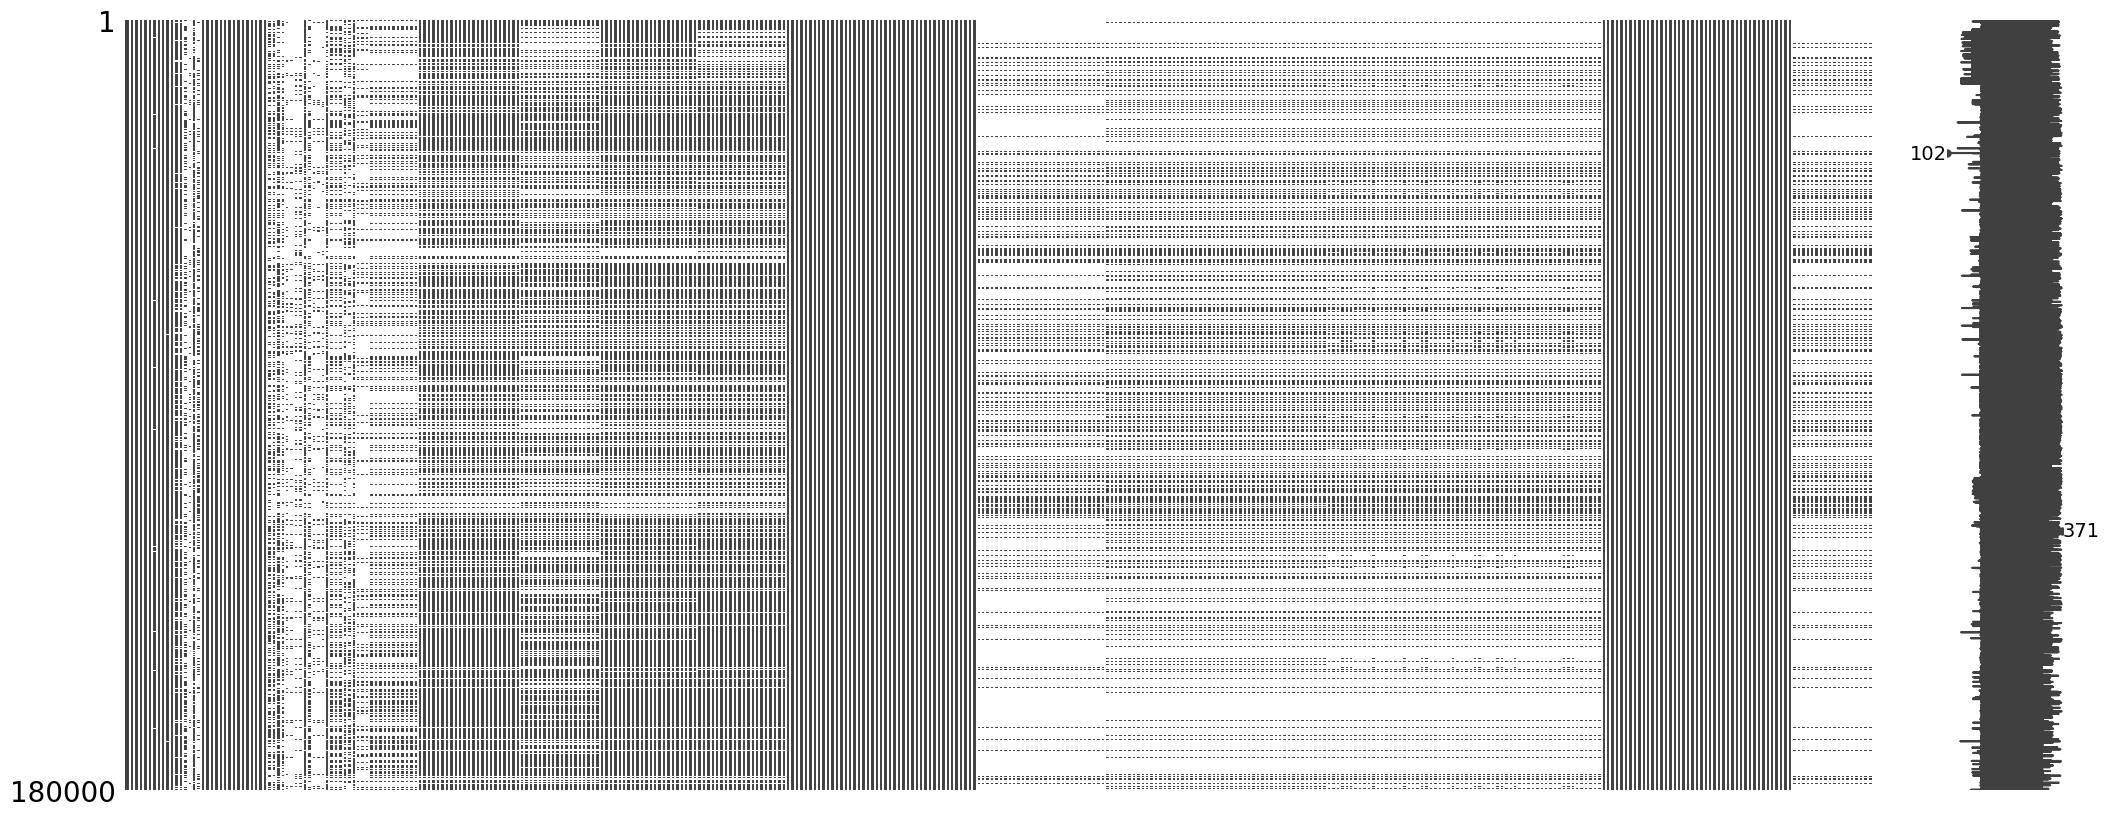

In [14]:
msno.matrix(train_df)
plt.show()

В наборе данных имеется большое к-во пропщенных значений. 

## Задание 1:
 Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

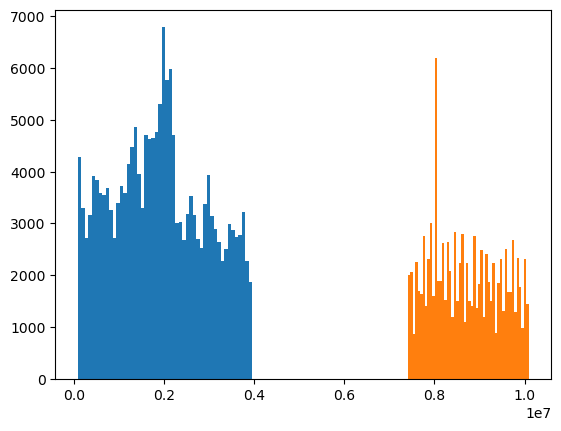

In [15]:
plt.hist(train_df['TransactionDT'], 50)
plt.hist(test_df['TransactionDT'], 50)
plt.show()

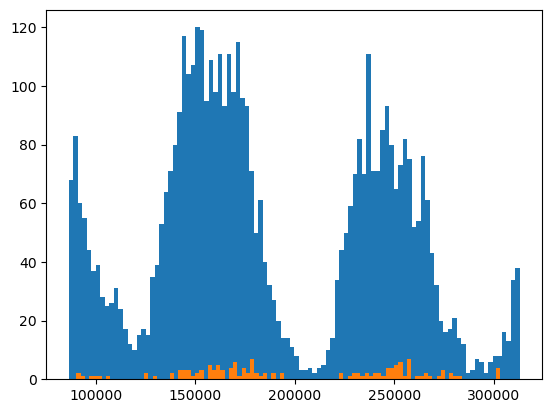

In [30]:
plt.hist(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

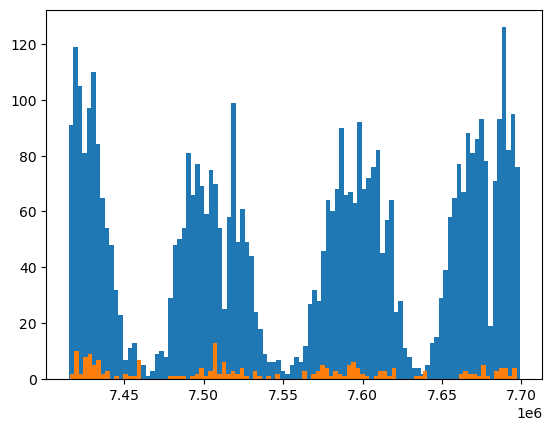

In [29]:
plt.hist(test_df.loc[((test_df['isFraud']==0) & (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(test_df.loc[((test_df['isFraud']==1) &  (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

## Задание 2:
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [14]:
# TransactionAmt - сумма транзакции.
# TransactionDT - дата/время транзакции.

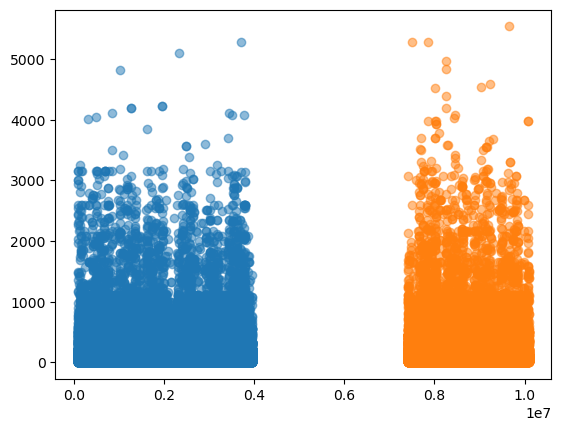

In [24]:
plt.scatter(train_df['TransactionDT'], train_df['TransactionAmt'], alpha=0.5)
plt.scatter(test_df['TransactionDT'], test_df['TransactionAmt'], alpha=0.5)
plt.show()

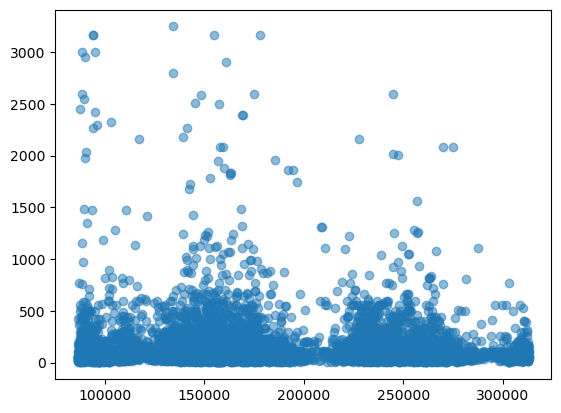

In [25]:
plt.scatter(train_df['TransactionDT'][:10000], train_df['TransactionAmt'][:10000], alpha=0.5)
plt.show()

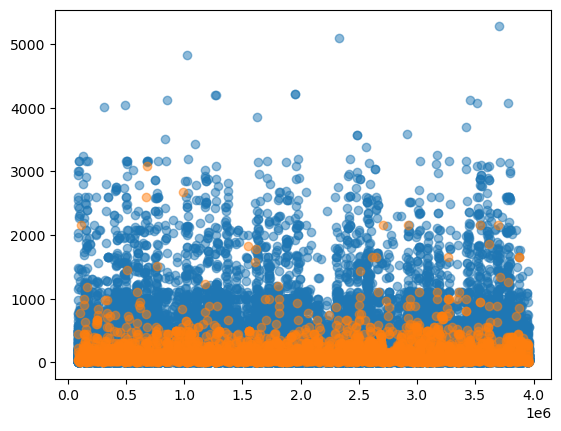

In [26]:
plt.scatter(train_df.loc[(train_df['isFraud']==0,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==0,'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[(train_df['isFraud']==1,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==1,'TransactionAmt')], alpha=0.5)
plt.show()

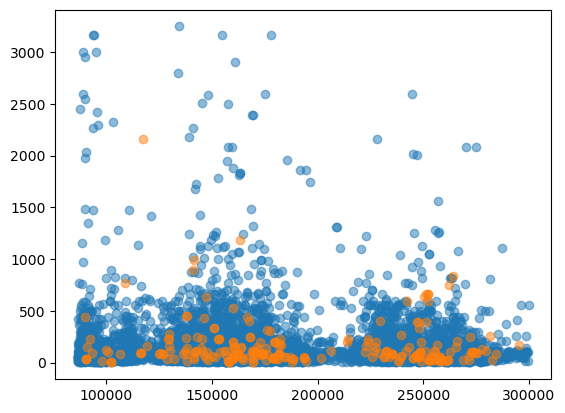

In [27]:
plt.scatter(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==0) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.show()

Видно, что суммы транзакций имеют периодических характер во времени. К-во мошейнеческих транзакций также менятес с тесчением времени вцелом повторя динамику обычных. 

Если судить по графику, суммы мошейнеческих транзакций в целом вдое ниже чем суммы оычных. 

так если большая часть транзакций прнимает значение чуть больше 1000 у.е. , то мошейнеческие транзакции соврешаются на сумму до 500 у.е. 

## Задание 3:
 построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.


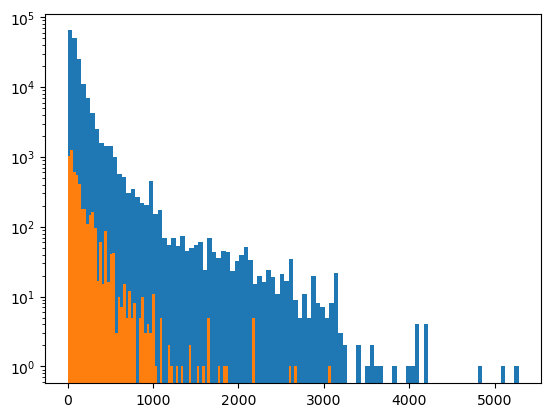

In [28]:
plt.hist(train_df.loc[(train_df['isFraud']==0, 'TransactionAmt') ], bins=100)
plt.hist(train_df.loc[(train_df['isFraud']==1, 'TransactionAmt') ], bins=100)
plt.yscale('log')
plt.show()

## Задание 4:
 построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

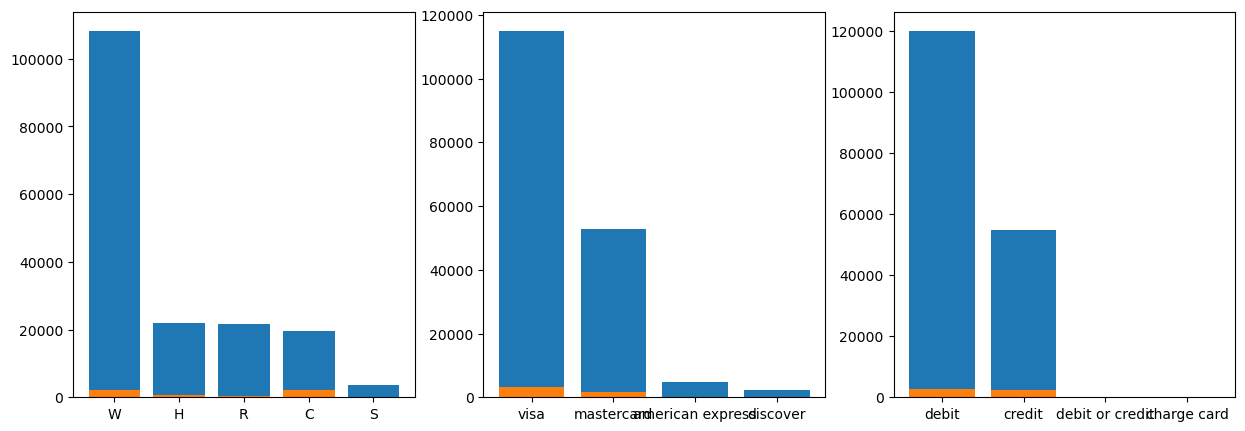

In [29]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==0, feature)].value_counts()
    ax[i].bar( values_list.index, values_list.values)
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

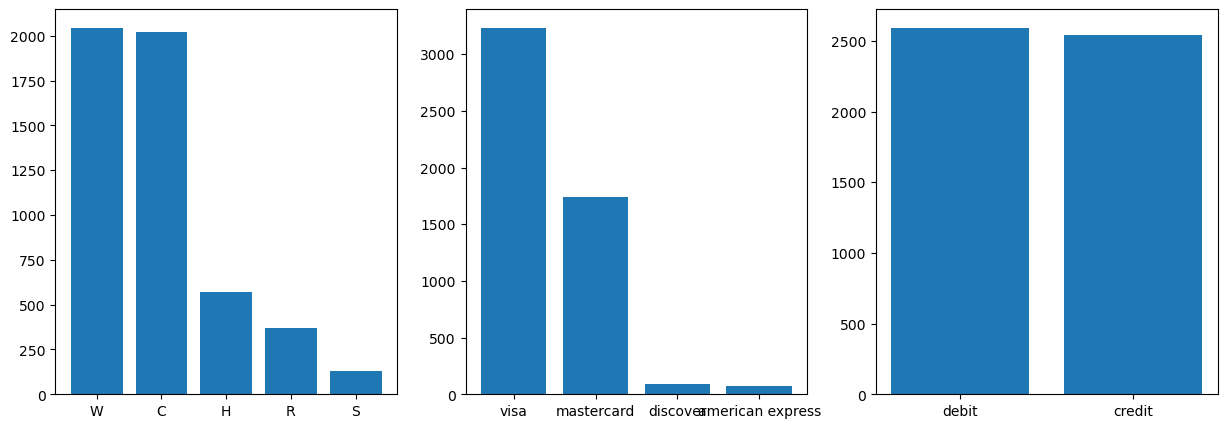

In [30]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

## Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

## Задание 1:
отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [31]:
y_data_train = train_df['isFraud']
x_data_train = train_df.drop(['isFraud'],axis=1)

y_data_test = test_df['isFraud']
x_data_test = test_df.drop(['isFraud'],axis=1)

In [32]:
# Получим список катероиальных и числовых признаков.

categorical = []
numerical = []
for col, value in x_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [33]:
x_data[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
x_train = x_data_train[numerical]
y_train = y_data_train

x_valid = x_data_test[numerical]
y_valid = y_data_test

In [35]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [36]:
params = {
    "booster": "gblinear",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [37]:
# model = xgb.train(
#     params=params,
#     dtrain=dtrain,
#     num_boost_round=1000,
#     early_stopping_rounds=50,
#     evals=[(dtrain, "train"), (dvalid, "valid")],
#     verbose_eval=10,
#     maximize=True,
# )

In [38]:
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=15,
    verbose_eval=50,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

[23:54:21] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:54:22] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:54:22] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification

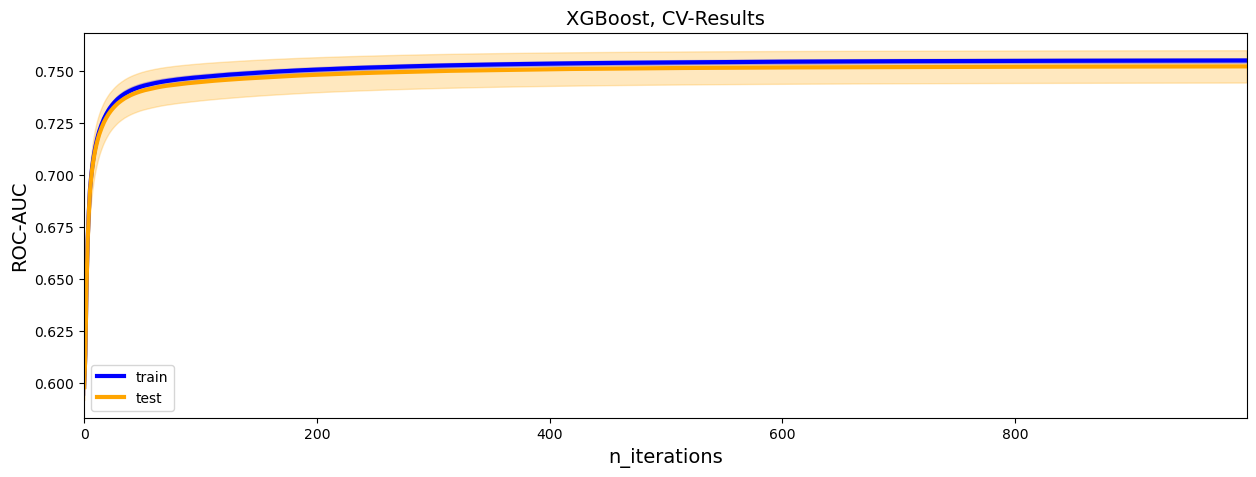

In [39]:
# fig = plt.figure(figsize=(15, 5))
# plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
# plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")

# plt.fill_between(
#     x=cv_result.index,
#     y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
#     y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
#     alpha=0.25, color="blue"
# )
# plt.fill_between(
#     x=cv_result.index,
#     y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
#     y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
#     alpha=0.25, color="orange"
# )

# plt.title("XGBoost, CV-Results", size=14)
# plt.xlabel("n_iterations", size=14)
# plt.xlim(0, cv_result.index.max())
# plt.ylabel("ROC-AUC", size=14)
# plt.legend(loc="best")
# plt.show()

In [40]:
def draw_result(cv_result): 
    fig = plt.figure(figsize=(15, 5))
    plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
    plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")

    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
        y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
        alpha=0.25, color="blue"
    )
    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
        y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
        alpha=0.25, color="orange"
    )

    plt.title("XGBoost, CV-Results", size=14)
    plt.xlabel("n_iterations", size=14)
    plt.xlim(0, cv_result.index.max())
    plt.ylabel("ROC-AUC", size=14)
    plt.legend(loc="best")
    plt.show()

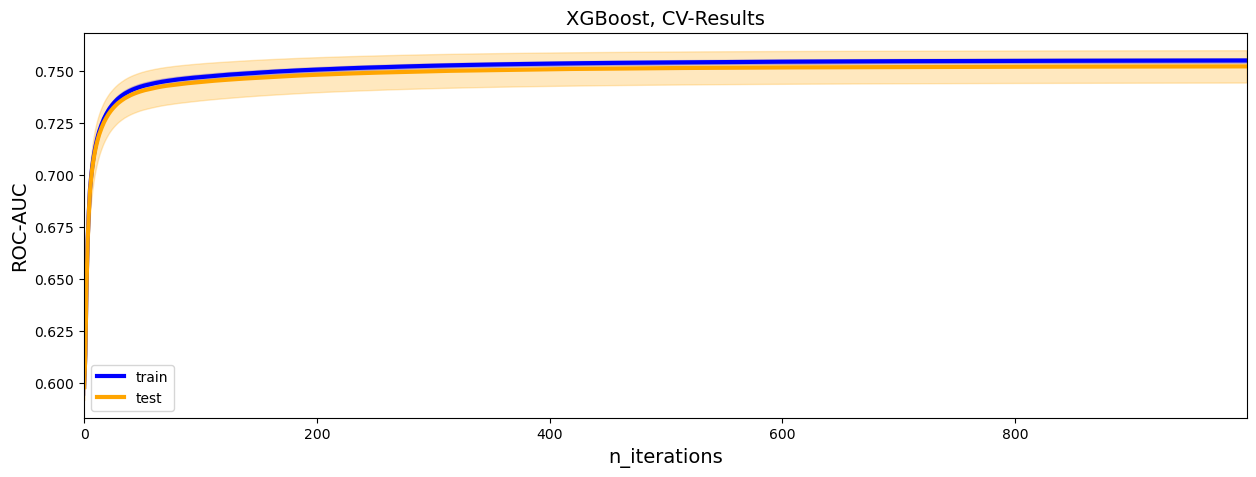

In [41]:
draw_result(cv_result)

## Задание 2:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [42]:
# приведем категориалные фитчи к числовому виду.

In [43]:
# categorical

In [44]:
# y_data_train = train_df['isFraud']
# x_data_train = train_df.drop(['isFraud'],axis=1)

# y_data_test = test_df['isFraud']
# x_data_test = test_df.drop(['isFraud'],axis=1)

In [45]:
# x_train = x_data_train[numerical]
# y_train = y_data_train

# x_valid = x_data_test[numerical]
# y_valid = y_data_test

In [46]:
def category_to_digit(df, features):  
    for i, feature in enumerate(features):
        
        values_list = df[feature].value_counts()

        for names in values_list.index:
            df.insert(3, f'{feature}_{names}', np.where((df[feature]==names),1,0), True)
            
    df.drop(features, axis=1, inplace=True)

In [47]:
print(categorical)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [48]:
features = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

x_data_train_cat =  x_data_train.iloc[:]
x_data_test_cat =  x_data_test.iloc[:]

category_to_digit(x_data_train_cat, features)
category_to_digit(x_data_test_cat, features)

# Удалим все категориальные признаки.
x_data_train_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
x_data_test_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

In [51]:
# x_train_cat = x_data_train[numerical]
# y_train = y_data_train

# x_valid = x_data_test[numerical]
# y_valid = y_data_test

In [52]:
x_data_train_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_F,M9_T,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.5,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,1,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
dtrain = xgb.DMatrix(
    data=x_data_train_cat, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_data_test_cat, label=y_valid
)

In [58]:
x = y_train.value_counts()

In [61]:
x.values

array([174859,   5141])

In [60]:
class_weight = x.values[0]/x.values[1]
class_weight

34.01264345458082

In [ ]:
class_weight

train_df['isFraud'].value_counts()

In [63]:
cv_result = xgb.cv((
    #  sample_weight={0:1, 1:class_weight},
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=25,
    verbose_eval=10,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

TypeError: cv() got an unexpected keyword argument 'sample_weight'

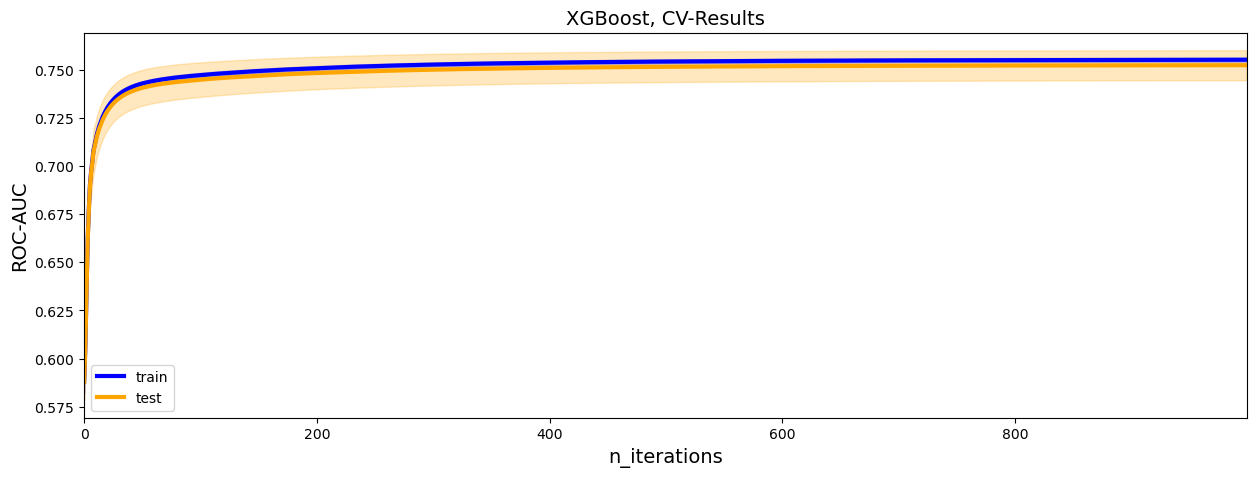

In [55]:
draw_result(cv_result)

## Задание 4:
для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [ ]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

In [ ]:
draw_result(model)

## Задание 5:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [ ]:
# params = {
#     "boosting_type": "gbdt",
#     "objective": "binary",
#     "metric": "auc",
#     "learning_rate": 0.01,
#     "n_estimators": 200,
#     "n_jobs": 6,
#     "seed": 27
# }

In [ ]:
dtrain = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
dvalid = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

In [ ]:
draw_result(model)

## Задание 6:
обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [ ]:
x_data_train_cat =  x_data_train.iloc[:]
x_data_test_cat =  x_data_test.iloc[:]

In [ ]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [ ]:
dtrain = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
dvalid = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [ ]:
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature=categorical,
    early_stopping_rounds=15,
    verbose_eval=10
)

In [ ]:
draw_result(model)

In [64]:
categorical

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

## Задание 7:
для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [ ]:
cb_params = {
    "n_estimators": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

In [ ]:
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 8:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [ ]:
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 9:
обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [ ]:
# cb_params = {
#     "n_estimators": 200,
#     "loss_function": "Logloss",
#     "eval_metric": "AUC",
#     "task_type": "CPU",
#     "max_bin": 20,
#     "verbose": 10,
#     "max_depth": 6,
#     "l2_leaf_reg": 100,
#     "early_stopping_rounds": 50,
#     "thread_count": 6,
#     "random_seed": 42
# }

In [ ]:
train_pool = cb.Pool(x_train, y_train, cat_features=categorical)
valid_pool = cb.Pool(x_valid, y_valid, cat_features=categorical)

In [ ]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(train_pool, eval_set=valid_pool)

## Задание 10:
построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.



## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.
